In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import seaborn as sns
from astropy import stats
from astropy.stats import sigma_clip,mad_std

In [2]:
cv = pd.read_csv("10000cv.csv")
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   run     10000 non-null  int64  
 1   camCol  10000 non-null  int64  
 2   rerun   10000 non-null  int64  
 3   field   10000 non-null  int64  
 4   objID   10000 non-null  int64  
 5   u       10000 non-null  float64
 6   g       10000 non-null  float64
 7   r       10000 non-null  float64
 8   i       10000 non-null  float64
 9   z       10000 non-null  float64
 10  ra      10000 non-null  float64
 11  dec     10000 non-null  float64
 12  Err_u   10000 non-null  float64
 13  Err_g   10000 non-null  float64
 14  Err_r   10000 non-null  float64
 15  Err_i   10000 non-null  float64
 16  Err_z   10000 non-null  float64
dtypes: float64(12), int64(5)
memory usage: 1.3 MB


Creating a Aintoff Projection




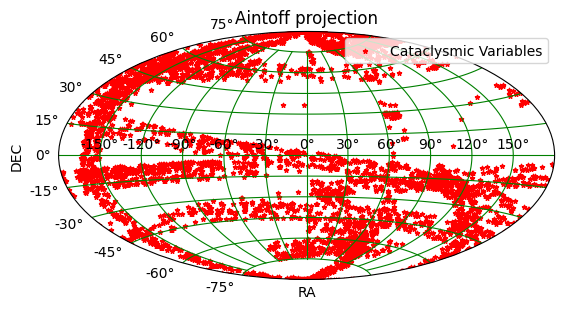

In [3]:
plt.subplot(projection = 'aitoff')
plt.scatter(cv['ra'], cv['dec'], s=10, marker = '*', c='r', label = 'Cataclysmic Variables')
plt.grid(c = 'green')
plt.title('Aintoff projection')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(loc =1)
#plt.savefig("aintoff.pdf")
plt.show()


In [ ]:
#cv_fits = fits.open('Cv.fits', memmap=True)
#cv_fits.close()
#with fits.open('Cv.fits') as hdul: cannot open in this way

COLOR-MAGNITUD Diagram in which we can see the average temperature of this Cataclismic variables 

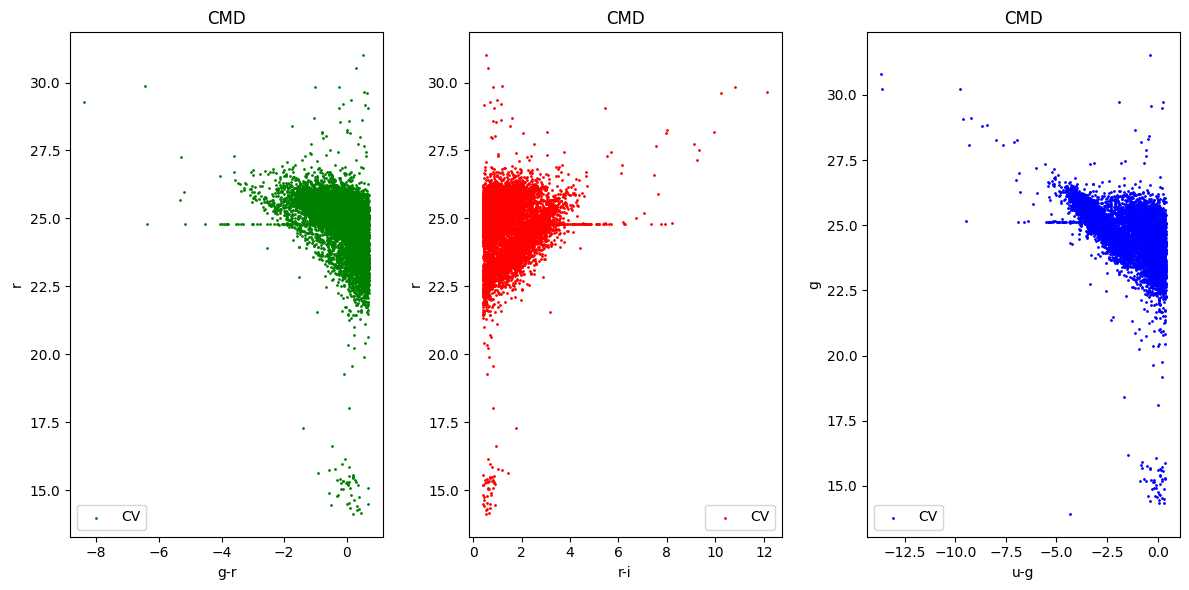

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].scatter(cv['g']-cv['r'], cv['r'],label='CV', marker='o', s=1, c='g')
axes[0].set_title("CMD")
axes[0].set_xlabel('g-r')
axes[0].set_ylabel('r')
axes[0].legend(loc=3)

axes[1].scatter(cv['r']-cv['i'], cv['r'],label='CV', marker='o', s=1, c='r')
#axes[1].axis('tight')
axes[1].set_title("CMD")
axes[1].set_xlabel('r-i')
axes[1].set_ylabel('r')
axes[1].legend(loc=4)


axes[2].scatter(cv['u']-cv['g'], cv['g'],label='CV', marker='o', s=1, c='blue')
axes[2].set_title("CMD");
axes[2].set_xlabel('u-g')
axes[2].set_ylabel('g')
axes[2].legend(loc=3)
fig.tight_layout()
plt.savefig("cmd.pdf")
plt.show()

Now we calculate the mean, max, min values for each magnitude

In [5]:
mean_u = np.mean(cv['u'])
mean_err_u = np.mean(cv['Err_u'])
mean_g = np.mean(cv['g'])
mean_err_g = np.mean(cv['Err_g'])
mean_r = np.mean(cv['r'])
mean_err_r = np.mean(cv['Err_r'])
mean_i = np.mean(cv['i'])
mean_err_i = np.mean(cv['Err_i'])
mean_z = np.mean(cv['u'])
mean_err_z = np.mean(cv['Err_z'])

cv.agg(
    {
        "u": ["min", "max", "median", "mean"],
        "g": ["min", "max", "median", "mean"],
        "r": ["min", "max", "median", "mean"],
        "i": ["min", "max", "median", "mean"],
        "z": ["min", "max", "median", "mean"],
    }
)



,u,g,r,i,z
min,9.581036,13.925890,14.129340,13.516590,8.264819
max,31.132470,31.524070,31.003910,30.485210,29.801950
median,22.808600,24.827980,24.967690,23.803575,21.894945
mean,23.103251,24.662457,24.774132,23.416870,21.773890


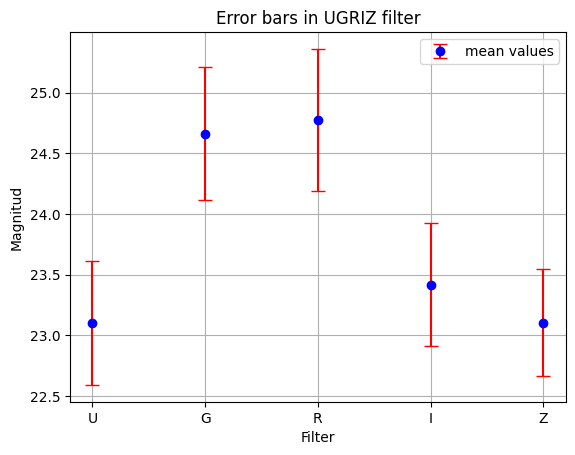

In [6]:


filters = ['U','G', 'R', 'I', 'Z']
magnitud = [mean_u,mean_g,mean_r,mean_i,mean_z]
errors = [mean_err_u,mean_err_g,mean_err_r,mean_err_i,mean_err_z] 

#error bars
plt.errorbar(filters, magnitud, yerr=errors, fmt='o', capsize=5, 
             ecolor='red', linestyle='None', color='blue', label='mean values')

plt.xlabel('Filter')
plt.ylabel('Magnitud')
plt.title('Error bars in UGRIZ filter')
#plt.gca().invert_yaxis()  
plt.legend()
plt.grid(True)
plt.savefig("error.pdf")
plt.show()

Using Scipy we can use of statistics description:

In [7]:
stats_summary_u =scipy.stats.describe(cv['u'],ddof =1, bias=False)
stats_summary_g =scipy.stats.describe(cv['g'],ddof =1, bias=False)
stats_summary_r =scipy.stats.describe(cv['r'],ddof =1, bias=False)
stats_summary_i =scipy.stats.describe(cv['i'],ddof =1, bias=False)
stats_summary_z =scipy.stats.describe(cv['z'],ddof =1, bias=False)

In [8]:
print (stats_summary_g)

DescribeResult(nobs=10000, minmax=(13.92589, 31.52407), mean=24.662457049, variance=1.1964105235548772, skewness=-3.225368046581477, kurtosis=26.318761065234025)


saving the summary statistic in a table and using list comprehension

In [61]:
tabla = [stats_summary_u,stats_summary_g,stats_summary_r,stats_summary_i,stats_summary_z]
[print(row) for row in tabla]


DescribeResult(nobs=10000, minmax=(9.581036, 31.13247), mean=23.103251018599998, variance=1.5686754252573476, skewness=-1.0340173627974913, kurtosis=8.620308947468363)
DescribeResult(nobs=10000, minmax=(13.92589, 31.52407), mean=24.662457049, variance=1.1964105235548772, skewness=-3.225368046581477, kurtosis=26.318761065234025)
DescribeResult(nobs=10000, minmax=(14.12934, 31.00391), mean=24.774132413000004, variance=1.3111571126508124, skewness=-3.0172295775444558, kurtosis=22.61660315221275)
DescribeResult(nobs=10000, minmax=(13.51659, 30.48521), mean=23.416870177000003, variance=1.817799491952614, skewness=-1.6687136239715488, kurtosis=8.270151291547812)
DescribeResult(nobs=10000, minmax=(8.264819, 29.80195), mean=21.7738896949, variance=1.7285559729631672, skewness=-1.76450629302695, kurtosis=9.099709284011334)


[None, None, None, None, None]

test normality in filters by plotting histogram and fitting a Gaussian, we look throug two properties Skewness and kurtois ,Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. 

Skewness of filter u: -1.034017
Kurtosis of filter u: 8.620309
Skewness of filter g: -3.225368
Kurtosis of filter g: 26.318761
Skewness of filter g: -3.017230
Kurtosis of filter g: 22.616603
Skewness of filter i: -1.668714
Kurtosis of filter i: 8.270151
Skewness of filter z: -1.764506
Kurtosis of filter z: 9.099709


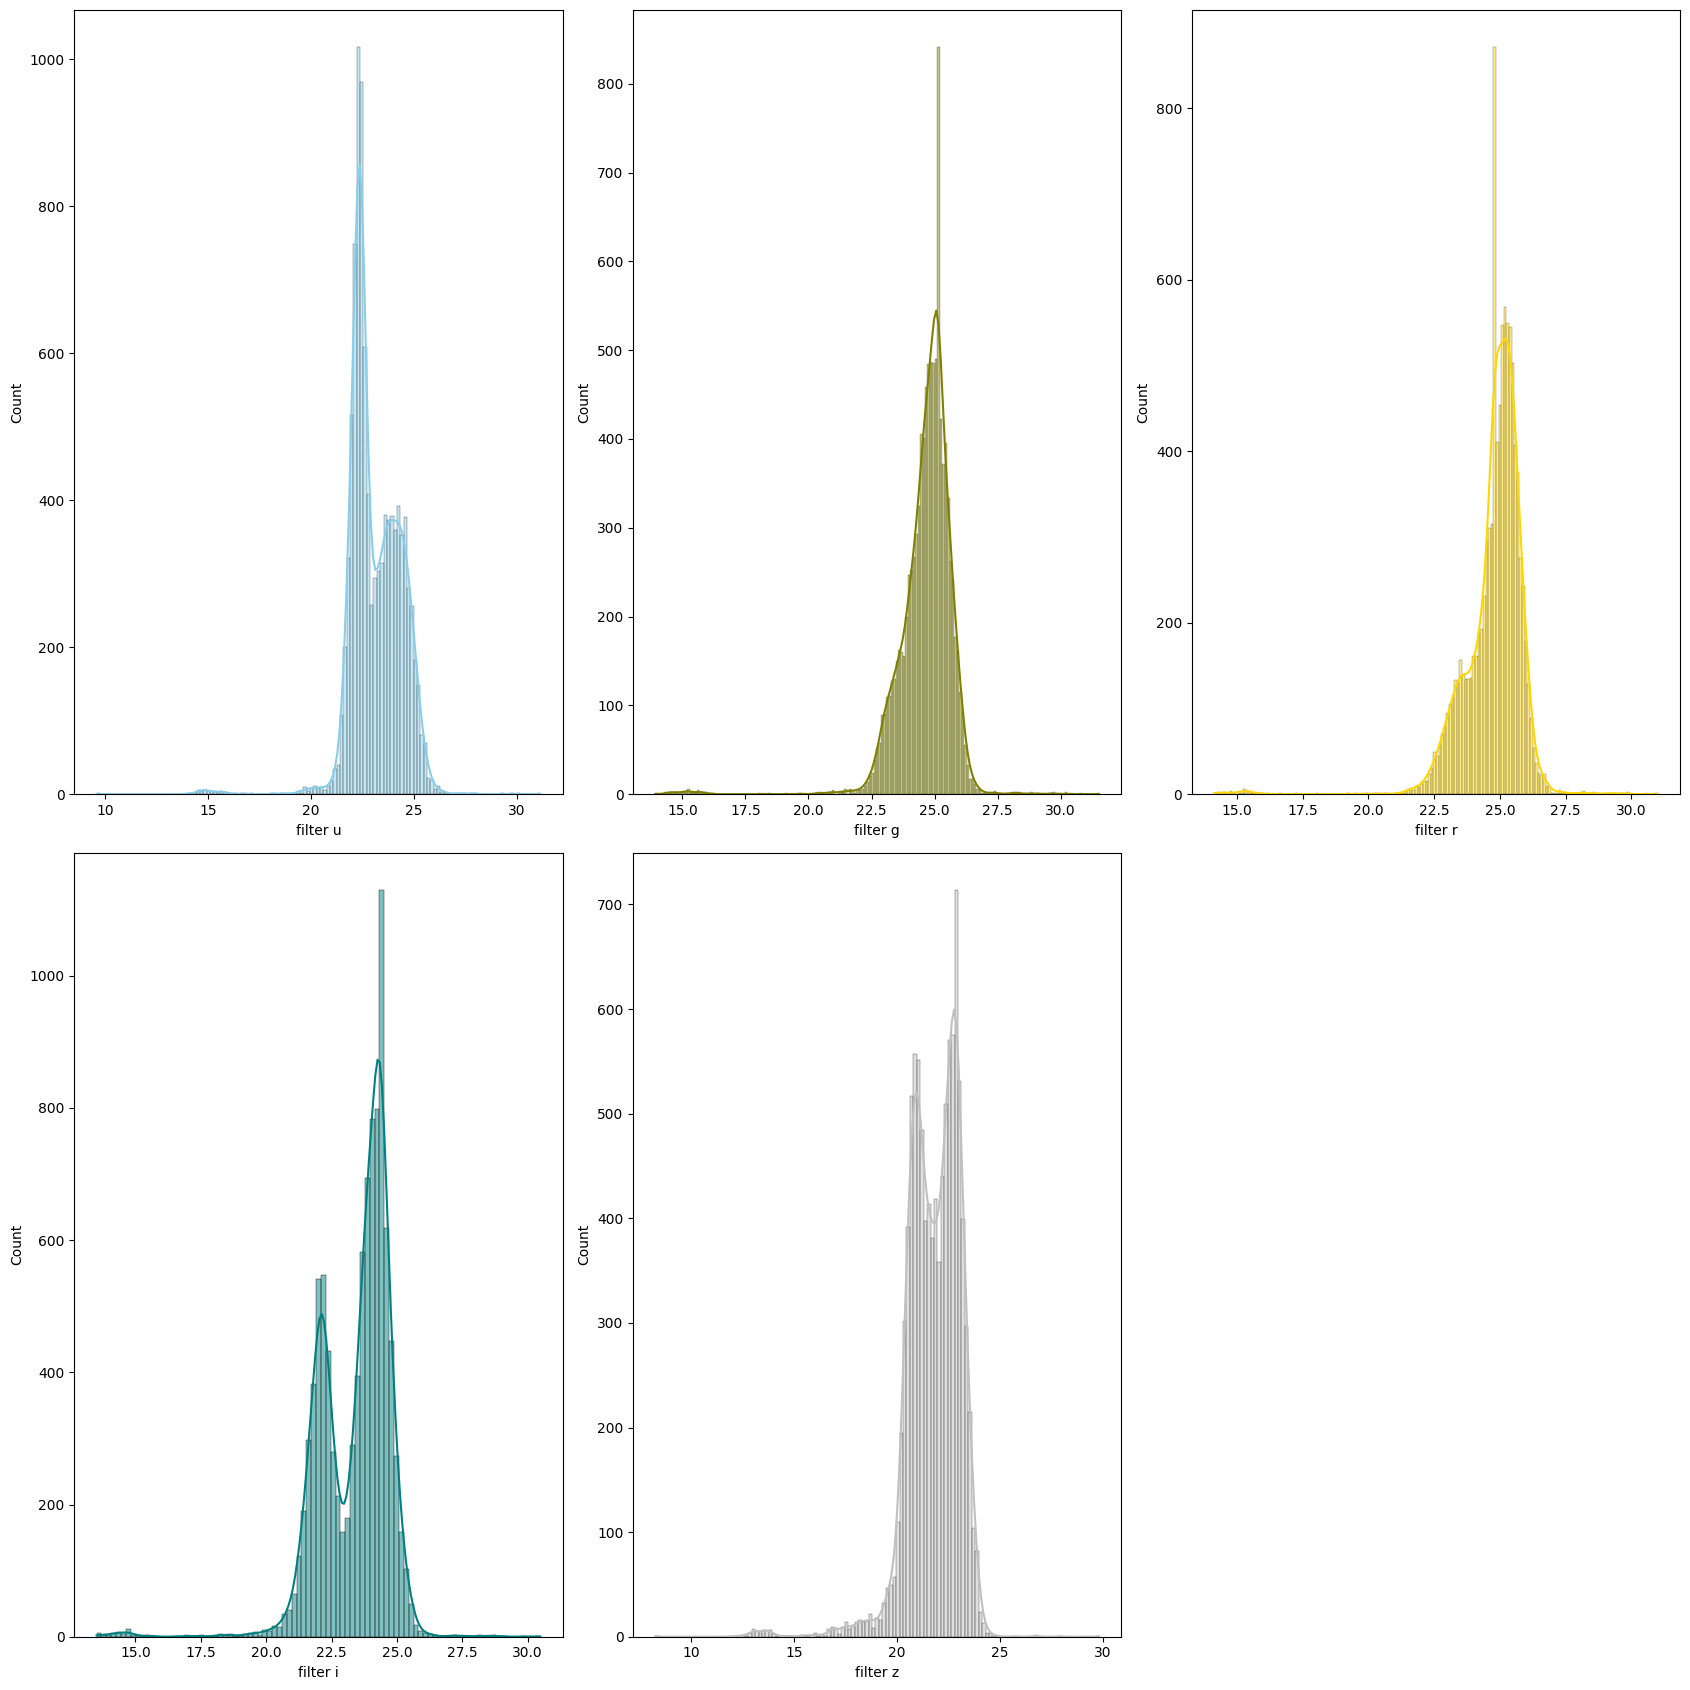

In [59]:
f, axes = plt.subplots(2,3, figsize =(17,17))

sns.histplot(cv['u'], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_xlabel('filter u')
print("Skewness of filter u: %f" % cv['u'].skew())
print("Kurtosis of filter u: %f" % cv['u'].kurt())


sns.histplot(cv['g'], kde=True, color="olive", ax=axes[0, 1])
axes[0, 1].set_xlabel('filter g')
print("Skewness of filter g: %f" % cv['g'].skew())
print("Kurtosis of filter g: %f" % cv['g'].kurt())

sns.histplot(cv['r'], kde=True, color="gold", ax=axes[0, 2])
axes[0, 2].set_xlabel('filter r')
print("Skewness of filter g: %f" % cv['r'].skew())
print("Kurtosis of filter g: %f" % cv['r'].kurt())

sns.histplot(cv['i'], kde=True, color="teal", ax=axes[1, 0])
axes[1, 0].set_xlabel('filter i')
print("Skewness of filter i: %f" % cv['i'].skew())
print("Kurtosis of filter i: %f" % cv['i'].kurt())

sns.histplot(cv['z'], kde=True, color="silver", ax=axes[1, 1])
axes[1, 1].set_xlabel('filter z')
print("Skewness of filter z: %f" % cv['z'].skew())
print("Kurtosis of filter z: %f" % cv['z'].kurt())

axes[1, 2].axis('off')  # Eliminate the empty plot
plt.tight_layout()
plt.show()


We want to know if there is a possible correlation between the filters 

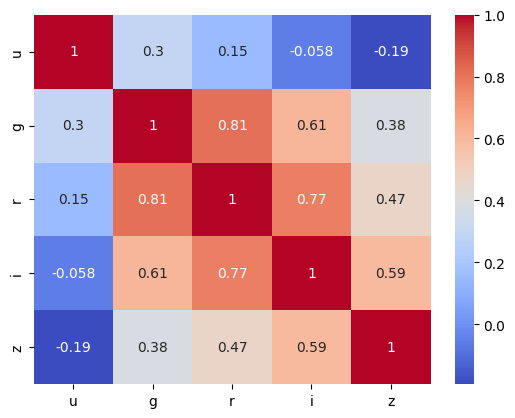

In [73]:
filters = ['u', 'g', 'r', 'i', 'z']
corr_matrix = cv[filters].corr()# create a correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

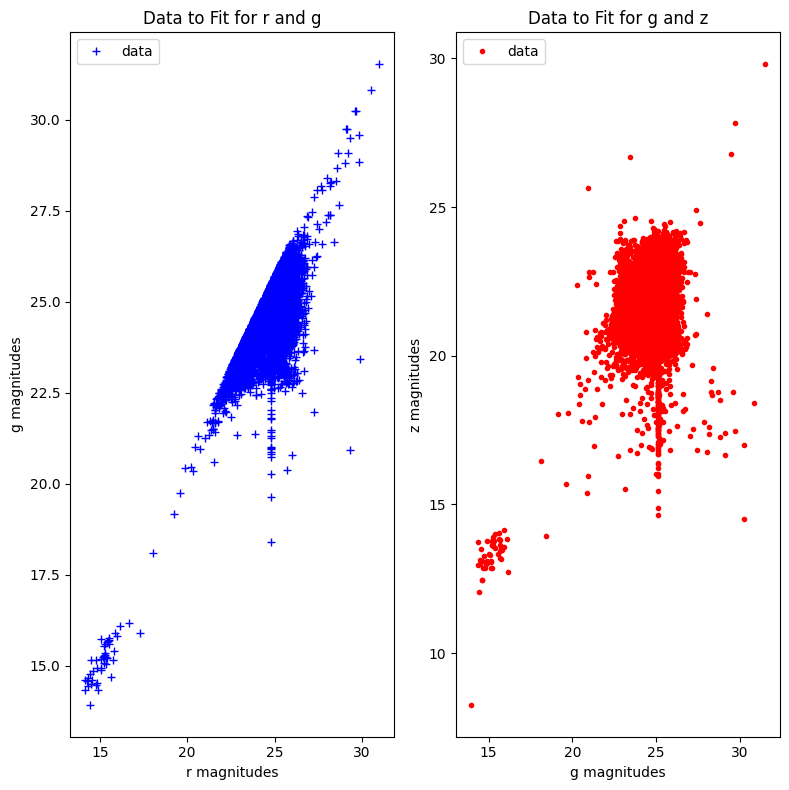

In [107]:
f, axes = plt.subplots(1,2, figsize =(8,8))
axes[0].plot(cv['r'], cv['g'], 'b+', label='data')
axes[0].set_xlabel('r magnitudes')
axes[0].set_ylabel('g magnitudes')
axes[0].set_title('Data to Fit for r and g')
axes[0].legend()

axes[1].plot(cv['g'], cv['z'], 'r.', label='data')
axes[1].set_xlabel('g magnitudes')
axes[1].set_ylabel('z magnitudes')
axes[1].set_title('Data to Fit for g and z')
axes[1].legend()

plt.tight_layout()  
plt.show()

We now define a function called linear_fit that implements the equations given above and returns two values: the slope  and the -intercept.

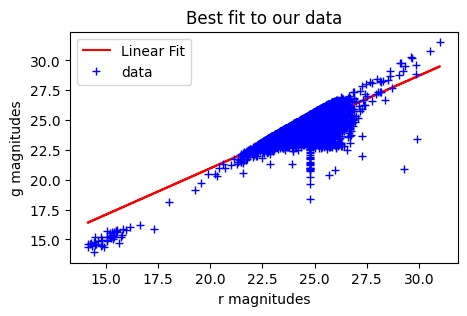

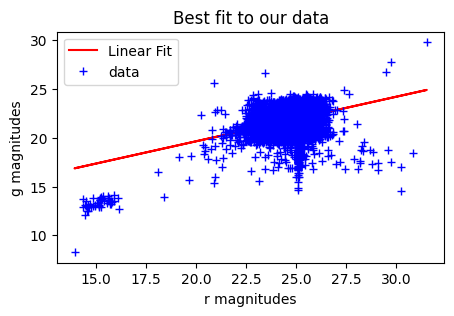

In [108]:
def linear_fit(x_data, y_data):
    #fill in code here
    N = len(x_data)
    array_1 = np.array([[N, np.sum(x_data)],[np.sum(x_data),np.sum(x_data**2)]])
    array_3 = np.array([[np.sum(y_data)],[np.sum(y_data*x_data)]])
    array_1_inv = np.linalg.inv(array_1)
    out_arr = np.dot(array_1_inv,array_3)
    intercept, slope = out_arr[0], out_arr[1]
    return slope, intercept

def plot_fit(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    plt.plot(x,fit_line,'r',label='Linear Fit')
    plt.plot(x,y,'b+',label='data')
    plt.legend()
    plt.xlabel('r magnitudes')
    plt.ylabel('g magnitudes')
    plt.title('Best fit to our data')
    plt.show()
    

plot_fit(cv['r'],cv['g'])
plot_fit(cv['g'],cv['z'])

In [118]:
def return_residuals(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    residuals = y - fit_line
    return residuals, np.sum(residuals)

residuals, sum_residuals = return_residuals(cv['r'],cv['g'])
residuals, sum_residuals2 = return_residuals(cv['g'],cv['z'])
print (sum_residuals,sum_residuals2)

1.2791893766461726e-08 1.0867161392980051e-08


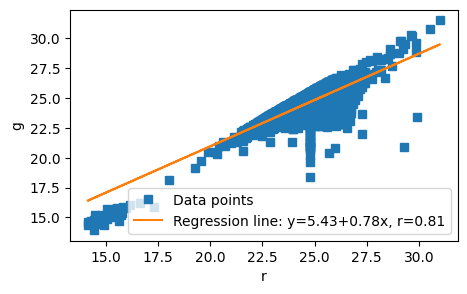

In [124]:
slope, intercept, r, *__ = scipy.stats.linregress(cv['r'],cv['g'])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(cv['r'],cv['g'], linewidth=0, marker ='s', label ='Data points')
ax.plot(cv['r'], intercept + slope * cv['r'], label=line)
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.legend(facecolor ='white')
plt.show()

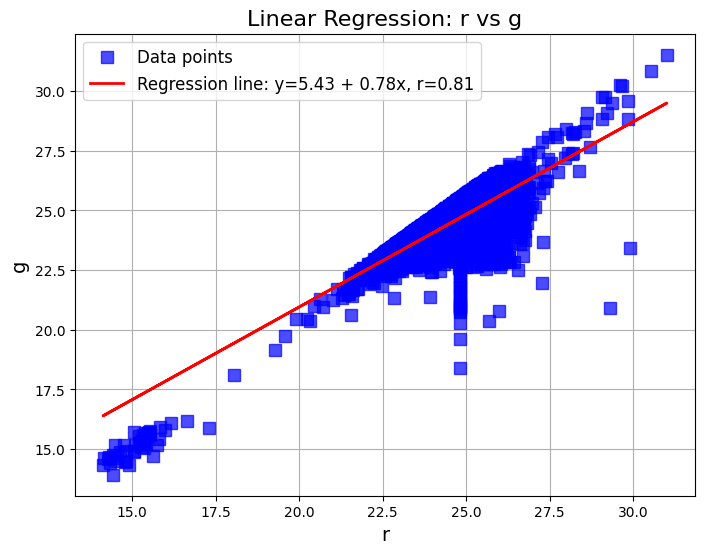

In [130]:
import scipy.stats as stats
# Perform the linear regression
slope, intercept, r, p_value, std_err = stats.linregress(cv['r'], cv['g'])

# Create the regression line equation for display
line = f'Regression line: y={intercept:.2f} + {slope:.2f}x, r={r:.2f}'

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))  # Increase the figure size for better readability

# Plot the data points with larger markers and some transparency (alpha)
ax.plot(cv['r'], cv['g'], 'bs', markersize=8, label='Data points', alpha=0.7)

# Plot the regression line
ax.plot(cv['r'], intercept + slope * cv['r'], 'r-', label=line, linewidth=2)

# Labeling the axes
ax.set_xlabel('r', fontsize=14)
ax.set_ylabel('g', fontsize=14)

# Add grid for better readability
ax.grid(True)

# Set the title of the plot
ax.set_title('Linear Regression: r vs g', fontsize=16)

# Show the legend with improved visibility
ax.legend(facecolor='white', fontsize=12)

# Display the plot
plt.show()

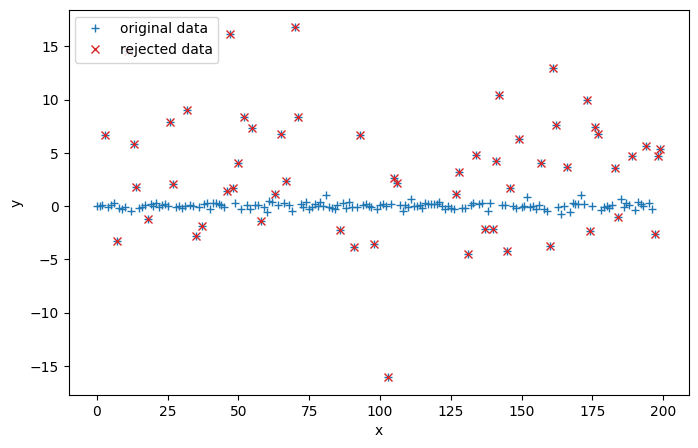

In [134]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from astropy.stats import sigma_clip, mad_std
# Generate fake data that has a mean of 0 and standard deviation of 0.2 with outliers

filtered_data = sigma_clip(cv['g'], sigma=3, maxiters=1, stdfunc=mad_std)
# plot the original and rejected data
plt.figure(figsize=(8,5))
plt.plot(x, y, '+', color='#1f77b4', label="original data")
plt.plot(x[filtered_data.mask], y[filtered_data.mask], 'x',color='#d62728', label="rejected data")
plt.xlabel('x')
plt.ylabel('y') 
plt.legend(loc=2, numpoints=1)

In [117]:
clip = sigma_clip(cv['u'])
clip

masked_array(data=[25.4978, 22.96463, --, ..., 21.84553, 23.60026,
                   25.05203],
             mask=[False, False,  True, ..., False, False, False],
       fill_value=1e+20)